In [1]:
#--------------------TASK 1--------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer, calculate_kmo

# ------ step 1.1 ---------
# Load data
data = pd.read_csv("customer_satisfaction_data.csv")

# Control checkpoint and initial glimpse of the dataset and variables 
data.info()
print(data.describe())

# Keep only survey columns (remove ID, date, and outcome variables)
exclude_cols = [
    'customer_id', 'quarter', 'survey_date',
    'overall_satisfaction', 'nps_score', 'renewal_likelihood',
    'revenue_growth_pct', 'referrals_generated'
]
satisfaction_data = data.drop(columns=exclude_cols)

# Drop missing values, these should be less than 5% of the dataset
satisfaction_data = satisfaction_data.dropna()

# Plot heatmap of variables correlation
plt.figure(figsize=(12,10))
sns.heatmap(satisfaction_data.corr(), cmap="coolwarm")
plt.title("Correlation Matrix for Variables")
plt.show()

# ------ step 1.2 ---------
# KMO test to check suitability for factor analysis
kmo_all, kmo_model = calculate_kmo(satisfaction_data)
print(f"KMO value: {kmo_model:.3f}")


# Calculate the average correlation
corr_matrix = satisfaction_data.corr()
corr_values = corr_matrix.values
avg_corr = np.mean(np.abs(corr_values[np.triu_indices_from(corr_values, k=1)]))
print(f"Average correlation: {avg_corr:.3f}")


ModuleNotFoundError: No module named 'factor_analyzer'

- Is the data suitable for factor analysis?
Yes, to begin with, the sample size is large (with n = 3400),exceeding the recommended minimum for reliable factor extraction. The data also contain only a few missing values, which can easily be handled through deletion without affecting reliability too much. The KMO measure resulted in 0.959, which is considered excellent. This means the dataset has strong shared variance which is an importand basis for factor analysis. Additionally, the average inter-item correlation is 0.337, which is can also be cosiderd okay. This suggests that while variables are correlated enough to be able to identify groups, but they are not so highly correlated that they represent the same thing.


- What do the initial patterns suggest about underlying factors?
The first patterns in the data show to several important hidden themes, such as responsiveness, project delivery, trust in the relationship, financial value, and innovation. Together these explain how customers judge the company’s performance. These underlying factors make sense both conceptually and statistically, meaning they can also be clearly identified and analyzed through factor analysis.

  

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


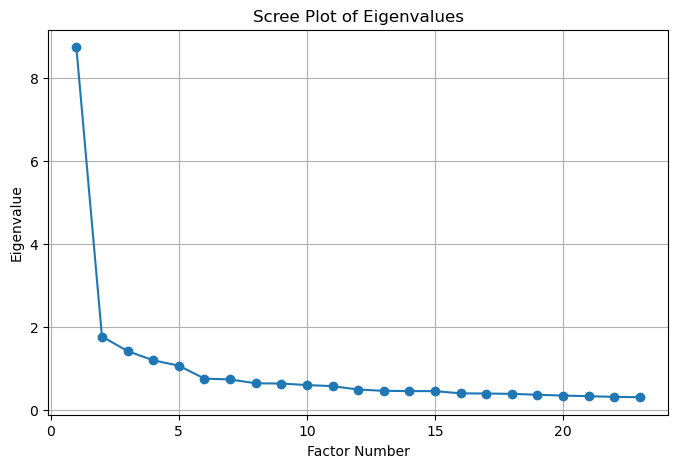

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Factor 1: With Eigenvalue = 8.747
Factor 2: With Eigenvalue = 1.776
Factor 3: With Eigenvalue = 1.425
Factor 4: With Eigenvalue = 1.204
Factor 5: With Eigenvalue = 1.073
Factor 6: With Eigenvalue = 0.762
Factor 7: With Eigenvalue = 0.741
Factor 8: With Eigenvalue = 0.650
Factor 9: With Eigenvalue = 0.642
Factor 10: With Eigenvalue = 0.607
Factor 11: With Eigenvalue = 0.580
Factor 12: With Eigenvalue = 0.499
Factor 13: With Eigenvalue = 0.468
Factor 14: With Eigenvalue = 0.462
Factor 15: With Eigenvalue = 0.460
Factor 16: With Eigenvalue = 0.407
Factor 17: With Eigenvalue = 0.402
Factor 18: With Eigenvalue = 0.395
Factor 19: With Eigenvalue = 0.372
Factor 20: With Eigenvalue = 0.353
Factor 21: With Eigenvalue = 0.338
Factor 22: With Eigenvalue = 0.322
Factor 23: With Eigenvalue = 0.314

Variance Explained by Each Factor:
   SS Loadings  Proportion Var  Cumulative Var
0     3.177979        0.138173        0.138173
1     2.621246        0.113967        0.252140
2     2.617596        0.113

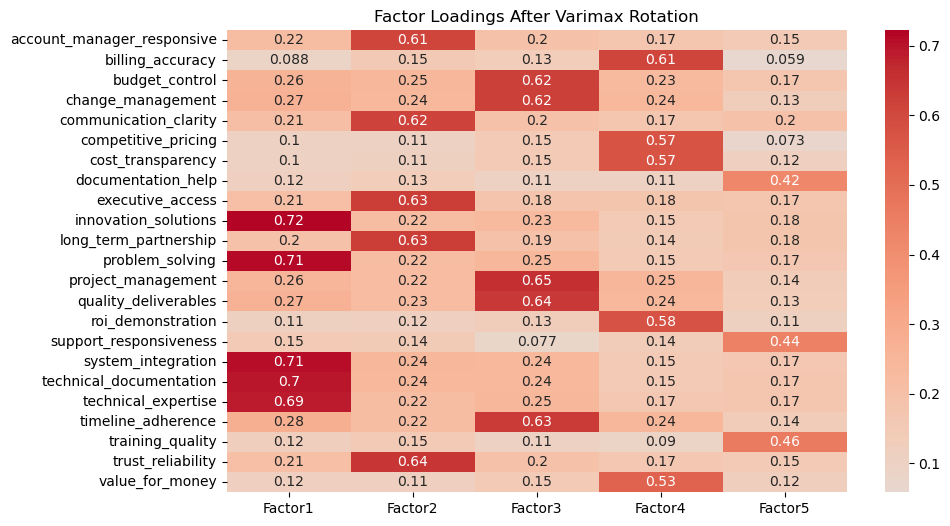

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Variance Explained by Each Factor (Promax):
   SS Loadings  Proportion Var  Cumulative Var
0     3.179052        0.138220        0.138220
1     2.807873        0.122081        0.260301
2     2.528874        0.109951        0.370252
3     1.892475        0.082282        0.452534
4     0.751978        0.032695        0.485228

Factor Loadings (using promax):
                            Factor1  Factor2  Factor3  Factor4  Factor5
account_manager_responsive    0.033    0.014    0.688    0.018   -0.021
billing_accuracy             -0.022   -0.018    0.062    0.664   -0.057
budget_control                0.008    0.729    0.032   -0.006    0.039
change_management             0.027    0.732    0.028    0.013   -0.017
communication_clarity         0.006    0.014    0.687    0.004    0.044
competitive_pricing           0.005    0.025   -0.015    0.617   -0.027
cost_transparency            -0.005    0.016   -0.019    0.608    0.028
documentation_help           -0.010    0.025   -0.001   -0.003  

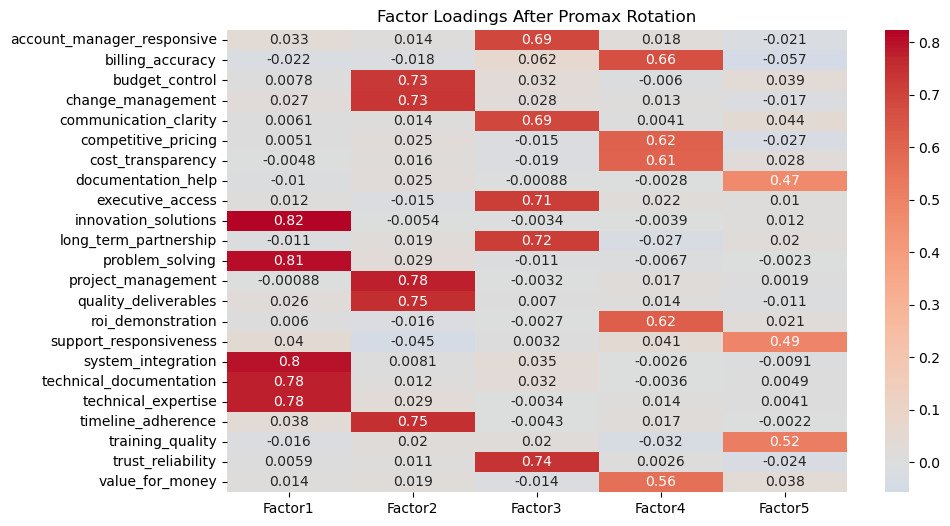

Bartlett’s test chi-square: 33163.378, p-value: 0.00000000000000000000


In [ ]:
#--------------------TASK 2--------------------------
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# -------- Step 2.1 --------

# Scale the data for later analysis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(satisfaction_data)

# Execute an initial factor analysis and calculate eigenvalues
fa = FactorAnalyzer(rotation=None)
fa.fit(scaled_data)
eigenvalues, vectors = fa.get_eigenvalues()

# Plot Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Scree Plot of Eigenvalues")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

# Print eigenvalues all the factors
for i, val in enumerate(eigenvalues, start=1):
    print(f"Factor {i}: With Eigenvalue = {val:.3f}")

# -------- Step 2.2 --------

# Choose 5 factors (based on Kaiser > 1 and scree plot)
n_factors = 5  

# Execute a factor analysis with varimax rotation
fa_varimax = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa_varimax.fit(scaled_data)

# Get variance that can be explained by each respective factor
variance = fa_varimax.get_factor_variance()
variance_df = pd.DataFrame({
    'SS Loadings': variance[0],
    'Proportion Var': variance[1],
    'Cumulative Var': variance[2]
})
print("\nVariance Explained by Each Factor:")
print(variance_df)

# Get the loading for each of the remaining factors
loadings_varimax = pd.DataFrame(
    fa_varimax.loadings_,
    index=satisfaction_data.columns,
    columns=[f'Factor{i+1}' for i in range(fa_varimax.n_factors)]
)
print("\n Factor Loadings (using varimax):")
print(loadings_varimax.round(3))

# Plot loadings as a heatmap for overview
plt.figure(figsize=(10,6))
sns.heatmap(loadings_varimax, annot=True, cmap='coolwarm', center=0)
plt.title("Factor Loadings After Varimax Rotation")
plt.show()


# Execute a factor analysis with promax rotation
fa_promax = FactorAnalyzer(n_factors=n_factors, rotation='promax')
fa_promax.fit(scaled_data)

# Get variance that can be explained by each respective factor
variance = fa_promax.get_factor_variance()
variance_df = pd.DataFrame({
    'SS Loadings': variance[0],
    'Proportion Var': variance[1],
    'Cumulative Var': variance[2]
})
print("\nVariance Explained by Each Factor (Promax):")
print(variance_df)

# Get the loading for each of the remaining factors
loadings_promax = pd.DataFrame(
    fa_promax.loadings_,
    index=satisfaction_data.columns,
    columns=[f'Factor{i+1}' for i in range(fa_promax.n_factors)]
)
print("\nFactor Loadings (using promax):")
print(loadings_promax.round(3))

# Plot loadings as a heatmap for overview
plt.figure(figsize=(10,6))
sns.heatmap(loadings_promax, annot=True, cmap='coolwarm', center=0)
plt.title("Factor Loadings After Promax Rotation")
plt.show()

# Calculate and display results of Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(satisfaction_data)
print(f"Bartlett’s test chi-square: {chi_square_value:.3f}, p-value: {p_value:.20f}")

- How many factors best represent the data?
Five factors best represent the data. They capture most of the shared variance among the survey variable while still keeping the model interpretable. Keeping more might extra explanatory power but also make the solution harder to interpret.
- What does each factor represent in business terms?
    - Technical excellence: This dimension reflects the company’s innovation, problem-solving and technical expertise. Clients consistently rate this area highly, indicating strong technical credibility. 
    - Relationship management & trust: This dimension captures responsiveness, partnership reliability and communication clarity. These interpersonal qualities shape the client’s trust and willingness to renew. 
    - Project delivery and performance: This dimension represents on-time delivery efficiency, and adherence to quality standards. In other words, it demonstrates operational reliability. 
    - Financial value & transparency: This dimension covers billing accuracy, cost fairness and ROI demonstration. Moreover, it highlights how clearly the firm communicates value to clients. 
    - Support & Service quality: This dimension encompasses post-project responsiveness, training and documentation. These influence long-term satisfaction and advocacy. 

High Factor Loadings (> 0.4):


,Factor1,Factor2,Factor3,Factor4,Factor5
account_manager_responsive,,0.609914,,,
billing_accuracy,,,,0.60826,
budget_control,,,0.62357,,
change_management,,,0.624342,,
communication_clarity,,0.616934,,,
competitive_pricing,,,,0.57147,
cost_transparency,,,,0.570102,
documentation_help,,,,,0.420646
executive_access,,0.627632,,,
innovation_solutions,0.722124,,,,



Correlation between Factors and Business Outcomes:


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,overall_satisfaction,nps_score,renewal_likelihood
Factor1_Score,-0.000,0.008,0.028
Factor2_Score,0.022,0.004,0.029
Factor3_Score,-0.009,-0.007,0.022
Factor4_Score,-0.009,0.023,0.038
Factor5_Score,-0.019,0.010,0.016


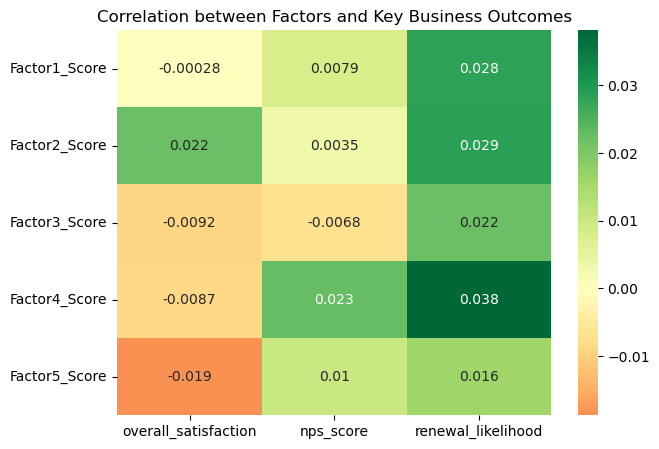

In [ ]:
#--------------------TASK 3--------------------------

# -------- Step 3.1: Factor Interpretation --------

# Use the Varimax results (5 factors)
loadings_df = pd.DataFrame(
    fa_varimax.loadings_,
    index=satisfaction_data.columns,
    columns=[f'Factor{i+1}' for i in range(fa_varimax.n_factors)]
)

# Display all loadings > 0.4 for easier interpretation
high_loadings = loadings_df.map(lambda x: x if abs(x) >= 0.4 else "")
print("High Factor Loadings (> 0.4):")
display(high_loadings)

# -------- Step 3.2: Business Insights and Recommendations --------

# Create a DataFrame of factor scores
factor_scores = fa_varimax.transform(scaled_data)
factor_scores_df = pd.DataFrame(
    factor_scores,
    columns=[f'Factor{i+1}_Score' for i in range(fa_varimax.n_factors)]
)

# Combine the factor score df with outcome variables
outcomes = data[['overall_satisfaction', 'nps_score', 'renewal_likelihood']]
combined = pd.concat([factor_scores_df, outcomes.reset_index(drop=True)], axis=1)

corr_matrix = combined.corr().iloc[:fa_varimax.n_factors, -3:]
print("\nCorrelation between Factors and Business Outcomes:")
display(corr_matrix.round(3))

# Display correlation results
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", center=0)
plt.title("Correlation between Factors and Key Business Outcomes")
plt.show()


- Which factors drive customer satisfaction most?
While no single factor shows a strong direct correlation, Factor 4 has the highest positive association with renewal likelihood (0.038) and a small positive link with NPS score (0.023). This suggests that customers who see clear, fair, and transparent pricing are more likely to renew their contracts and be satisfied.

Factor 2 also has slightly positive correlations with overall satisfaction (0.022) and renewal likelihood (0.029). This indicates that good communication and long-term partnerships matter for how clients perceive value and whether they stay loyal to TechnoServe.

The other factors show very weak relationships. 

- What specific actions should TechnoServe take?
The analysis shows that clear pricing and trusted relationships are the main factors for having and keeping satisfaction and loyalty. TechnoServe should therefore focus on communicating financial value more effectively and strengthening customer relationships while continuing to deliver consistent technical quality.


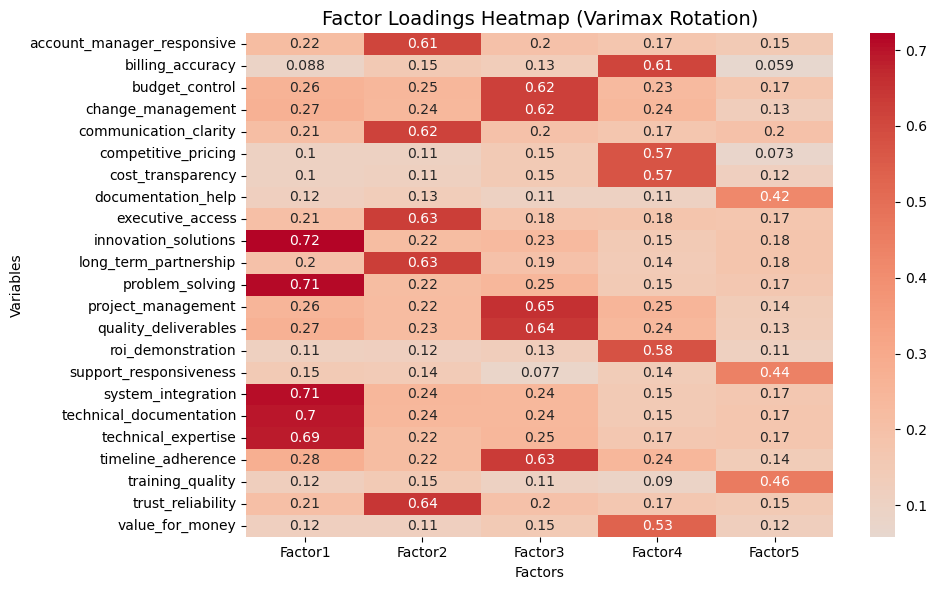

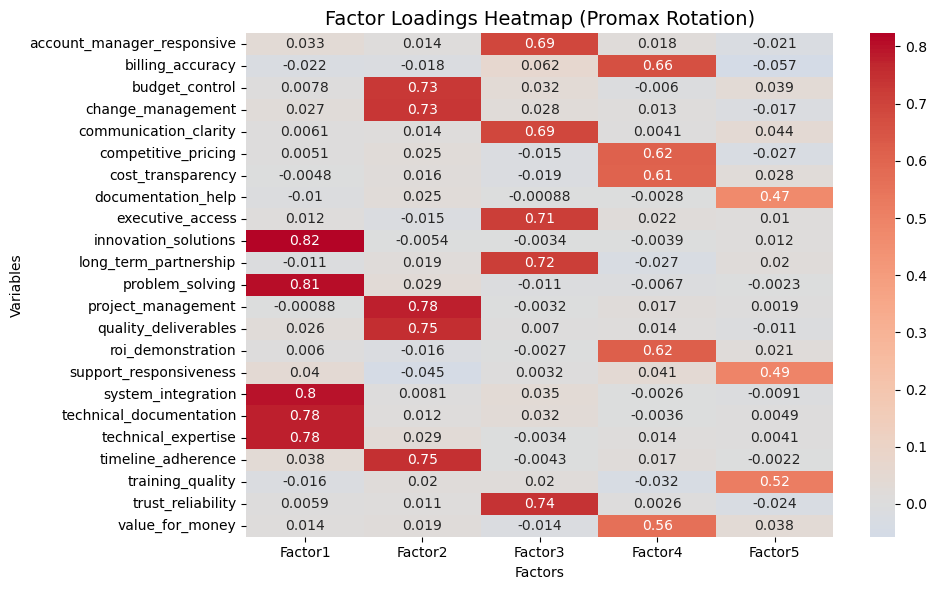

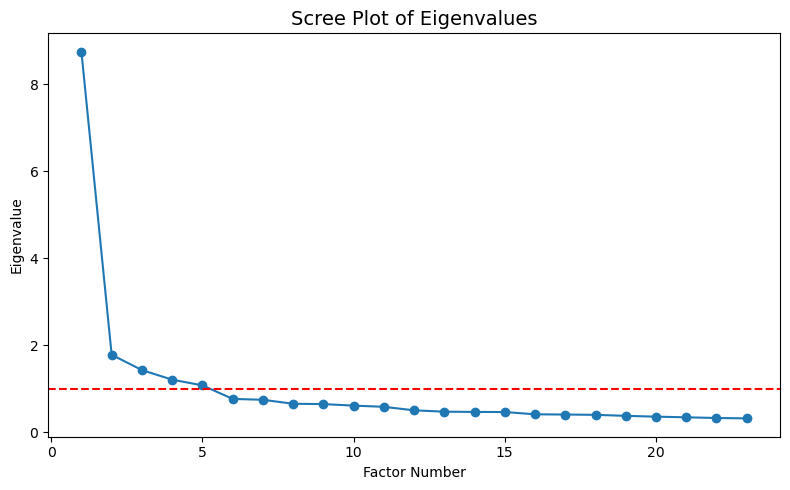

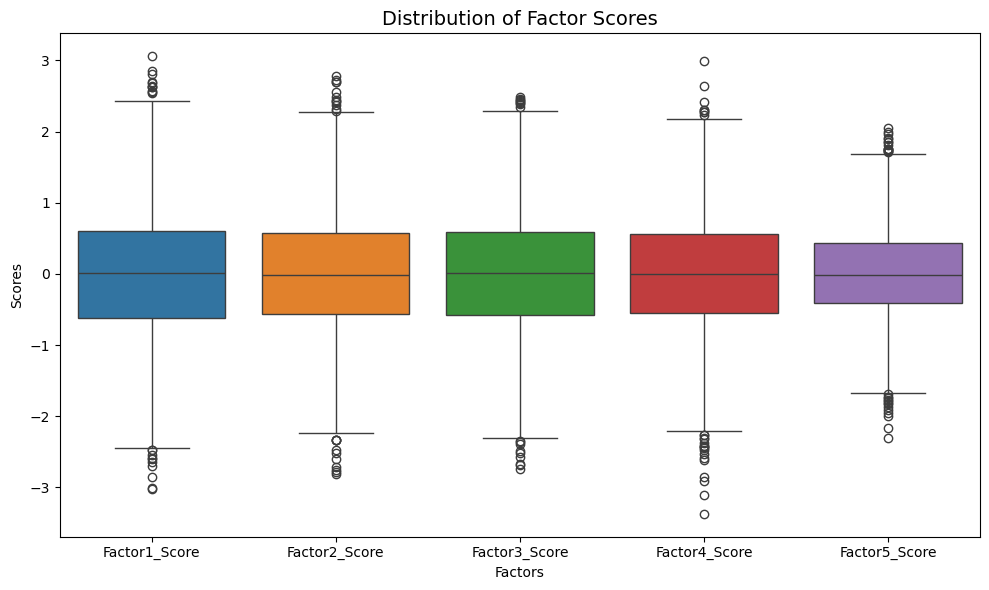

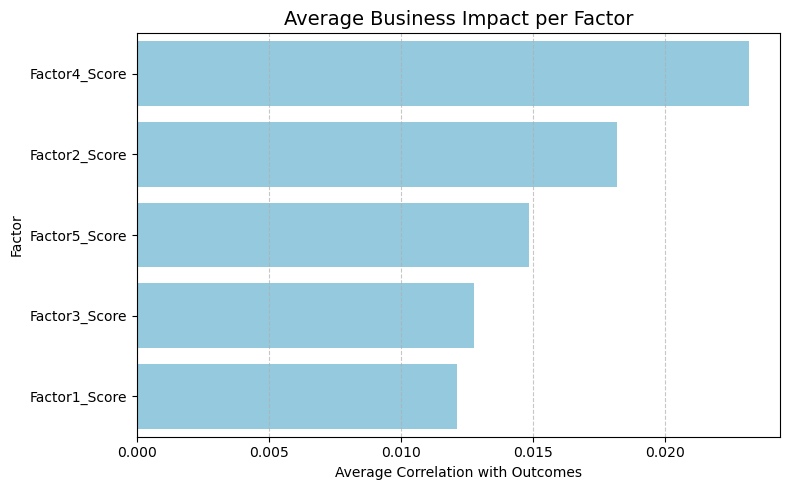

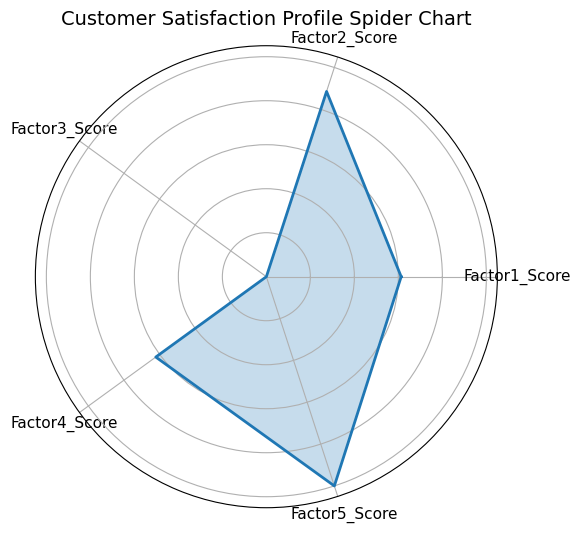

In [ ]:
#--------------------TASK 4--------------------------

# -------- Step 4.1: Visualization --------

# Factor Loadings Visualization (Varimax Rotation)
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_varimax, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap (Varimax Rotation)", fontsize=14)
plt.xlabel("Factors")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# Factor Loadings Visualization (Promax Rotation)
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_promax, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Loadings Heatmap (Promax Rotation)", fontsize=14)
plt.xlabel("Factors")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# Scree Plot for Factor Selection
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Scree Plot of Eigenvalues", fontsize=14)
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# Factor Scores Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=factor_scores_df)
plt.title("Distribution of Factor Scores", fontsize=14)
plt.xlabel("Factors")
plt.ylabel("Scores")
plt.tight_layout()
plt.show()

# Display bar chart with correlations
impact = corr_matrix.abs().mean(axis=1).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=impact.values, y=impact.index, color="skyblue")
plt.title("Average Business Impact per Factor", fontsize=14)
plt.xlabel("Average Correlation with Outcomes")
plt.ylabel("Factor")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Prepare data and angles for the spider chart
scaled_scores = factor_scores_df.mean()
# Normalize the values to range
scaled_scores = (scaled_scores - scaled_scores.min()) / (scaled_scores.max() - scaled_scores.min())

# Prepare labels and values for plotting
labels = scaled_scores.index
values = np.concatenate((scaled_scores.values, [scaled_scores.values[0]]))
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist() + [0]

# Plot chart to visualize satisfaction profile across factors
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
plt.title("Customer Satisfaction Profile Spider Chart", fontsize=14, pad=15)

plt.show()

### Conclusion: 
This analysis found five main areas that shape customer satisfaction: technical skills and innovation, trust and relationships, project quality, financial transparency, and support.
Among these, clear pricing and strong relationships have the biggest impact on satisfaction and loyalty.
This means customers stay loyal when they trust the company and feel they get fair value for their money.
TechnoServe should focus on clear communication, fair pricing, and ongoing client relationships, while keeping high standards in project quality and technical work.
Doing this will help the company improve satisfaction, renewals, and long-term success.